# 決策樹分類(Decision Tree Classifier)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import matplotlib.pyplot as plt

# Plot Decision Line

In [2]:
def plot_line(x_split,m,x_lim):
    # m:代表第m個feature
    # x_split:分割線
    # xlim:畫分割線的邊界
    # xlim[0,0],xlim[0,1]-->分類區橫軸最小值和最大值
    # xlim[1,0],xlim[1,1]-->分類區縱軸最小值和最大值
    if(m==0):
        plt.plot([x_split,x_split],[x_lim[1,0],x_lim[1,1]],'k',linewidth=6)
    else:
        plt.plot([x_lim[0,0],x_lim[0,1]],[x_split,x_split],'k',linewidth=6)

# Gini Index

In [3]:
def Gini(s,y,K):
    # 這個方程式對應到文章中的Gini_index
    # s:subtree裡面所有的index
    # K:種類樹木
    com=1
    for j in range(0,K):
        com-=(np.count_nonzero(y[s]==j)/len(s))**2
    return com

# Decision Stump

In [4]:
def Decision_Stump(x,y,K):
    # impurity_x0: 用來放橫軸特徵的impurity候選值
    # impurity_x1: 用來放縱軸特徵的impurity候選值
    impurity_x0=np.zeros(len(y)-1)
    impurity_x1=np.zeros(len(y)-1)
    # x0_sort: 所有資料點橫軸座標排序
    # x1_sort: 所有資料點縱軸座標排序
    x0_sort=np.sort(x[:,0])
    x1_sort=np.sort(x[:,1])
    # x0_sort_index:所有資料點橫軸座標排序後所對應的index
    # x1_sort_index:所有資料點縱軸座標排序後所對應的index
    x0_sort_index=np.argsort(x[:,0])
    x1_sort_index=np.argsort(x[:,1])
    # 這裡的演算法核心就是我們以排列好的橫軸和縱標
    # 從第一個資料開始分成兩半，然後並計算impurity值
    for i in range(1,len(y)):
        # 分成左右subtree
        s_left,s_right=x0_sort_index[:i],x0_sort_index[i:]
        # 計算對應的橫軸impirity值
        impurity_x0[i-1]=(len(s_left)/len(y))*Gini(s_left,y,K)+(len(s_right)/len(y))*Gini(s_right,y,K)
        # 分成左右subtree
        s_left,s_right=x1_sort_index[:i],x1_sort_index[i:]
        # 計算對應的縱軸impirity值
        impurity_x1[i-1]=(len(s_left)/len(y))*Gini(s_left,y,K)+(len(s_right)/len(y))*Gini(s_right,y,K)
    # 比較橫軸和縱軸最小的impurity值
    # 如果其中一個比較小，救回傳
    if(min(impurity_x0)<min(impurity_x1)):
        x_split=(x0_sort[np.argmin(impurity_x0)]+x0_sort[np.argmin(impurity_x0)+1])/2
        return x_split,0,min(impurity_x0)
    else:
        x_split=(x1_sort[np.argmin(impurity_x1)]+x1_sort[np.argmin(impurity_x1)+1])/2
        return x_split,1,min(impurity_x1)

# Decision Tree Algorithms

In [5]:
def Decision_Tree(x,y,max_depth,x_lim,K):
    # 執行decision_stump找出最佳分割線
    x_split,m,impurity=Decision_Stump(x,y,K)
    # 畫出分割線
    plot_line(x_split,m,x_lim)
    # 切分我們的數據，這裡可以對應到b(x)
    p=x[:,m]<x_split
    # 建立左邊和右邊的subtree
    x_left,y_left=x[p],y[p]
    x_right,y_right=x[~p],y[~p]
    # 建立subtree的資料範圍以方便繪圖
    x_lim_left,x_lim_right=np.zeros((2,2)),np.zeros((2,2))
    # 更改subtree的資料範圍
    if(m==0):
        x_lim_left[0,0],x_lim_left[0,1],x_lim_left[1,0],x_lim_left[1,1]=x_lim[0,0],x_split,x_lim[1,0],x_lim[1,1]
        x_lim_right[0,0],x_lim_right[0,1],x_lim_right[1,0],x_lim_right[1,1]=x_split,x_lim[0,1],x_lim[1,0],x_lim[1,1]
    else:
        x_lim_left[0,0],x_lim_left[0,1],x_lim_left[1,0],x_lim_left[1,1]=x_lim[0,0],x_lim[0,1],x_lim[1,0],x_split
        x_lim_right[0,0],x_lim_right[0,1],x_lim_right[1,0],x_lim_right[1,1]=x_lim[0,0],x_lim[0,1],x_split,x_lim[1,1]
    # 檢查左邊subtree的資料是否label都一樣
    check_left=True
    for i in range(0,len(y_left)):
        if(y_left[0]!=y_left[i]):
            check_left=False
            break
    # 檢查右邊subtree的資料是否label都一樣
    check_right=True
    for i in range(0,len(y_right)):
        if(y_right[0]!=y_right[i]):
            check_right=False
            break
    # decision tree 停止條件
    # 1. impirity=0 / 2. 達到最大深度 / 3.左右兩邊都完美分類好
    if((impurity==0)or(max_depth==0)or((check_left)and(check_right))):
        return
    # 左邊分類好的話，就只延伸右邊的subtree
    elif(check_left):
        max_depth-=1
        Decision_Tree(x_right,y_right,max_depth,x_lim_right,K)
        return
    # 右邊分類好的話，就只延伸左邊的subtree
    elif(check_right):
        max_depth-=1
        Decision_Tree(x_left,y_left,max_depth,x_lim_left,K)
        return
    # 兩邊的subtree都延伸
    else:
        max_depth-=1
        Decision_Tree(x_left,y_left,max_depth,x_lim_left,K)
        Decision_Tree(x_right,y_right,max_depth,x_lim_right,K)

# 二元分類

In [6]:
x=np.zeros((60,2))
y=np.zeros(60)
for i in range(0,60): 
    f=-0.04
    if(i<30):
        y[i]=1
        x[i,0]=random.random()
        x[i,1]=random.uniform(x[i,0],1)+f
    else:
        y[i]=-1
        x[i,0]=random.random()
        x[i,1]=random.uniform(0,x[i,0])-f

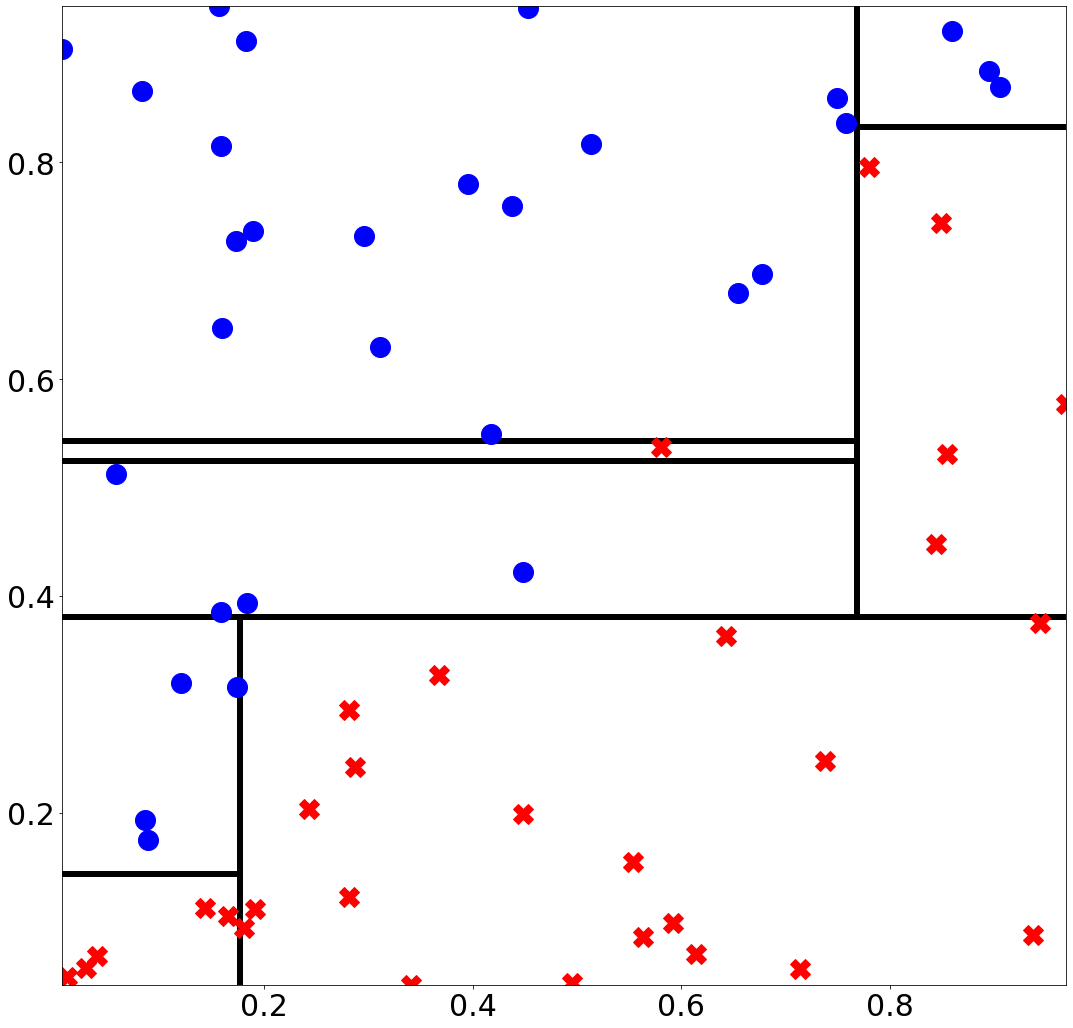

In [7]:
plt.rcParams["figure.figsize"] = (18,18)
#建立數據邊界
x_lim=np.zeros((2,2))
x_lim[0,0],x_lim[0,1]=min(x[:,0]),max(x[:,0])
x_lim[1,0],x_lim[1,1]=min(x[:,1]),max(x[:,1])
#執行演算法
Decision_Tree(x,y,3,x_lim,2)
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlim(x_lim[0,:])
plt.ylim(x_lim[1,:])
plt.show()

# 多元分類

In [8]:
x=np.zeros((200,2))
y=np.zeros(200)
for i in range(0,200): 
    f=0.95
    if(i<50):
        y[i]=0
        x[i,0]=random.random()+f
        x[i,1]=random.random()+f
    elif(i>=50 and i<100):
        y[i]=1
        x[i,0]=random.random()+f
        x[i,1]=random.random()
    elif(i>=100 and i<150):
        y[i]=2
        x[i,0]=random.random()
        x[i,1]=random.random()+f
    else:
        y[i]=3
        x[i,0]=random.random()
        x[i,1]=random.random()

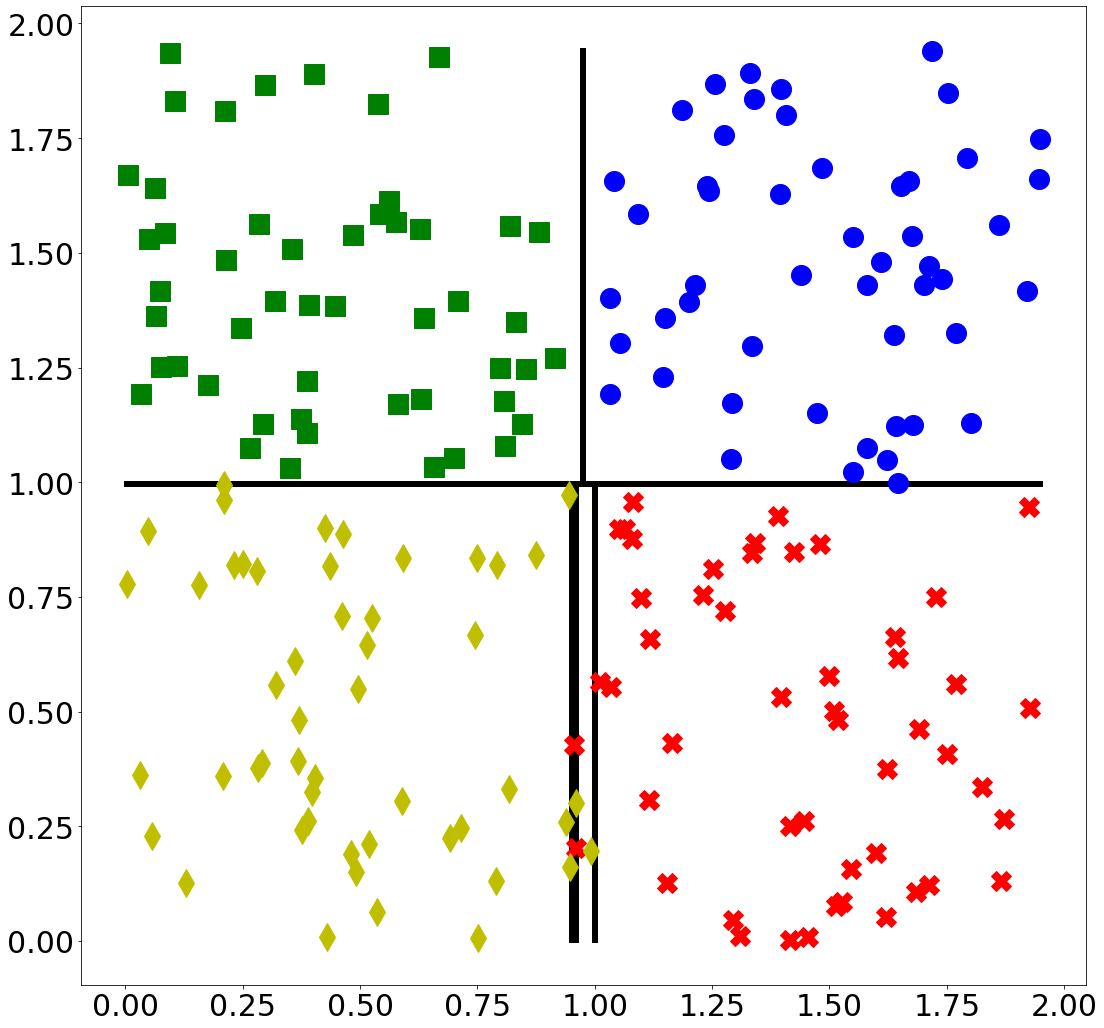

In [9]:
plt.rcParams["figure.figsize"] = (18,18)
x_lim=np.zeros((2,2))
x_lim[0,0],x_lim[0,1]=min(x[:,0]),max(x[:,0])
x_lim[1,0],x_lim[1,1]=min(x[:,1]),max(x[:,1])
Decision_Tree(x,y,5,x_lim,4)
plt.plot(x[:50,0],x[:50,1],"bo",markersize=20)
plt.plot(x[50:100,0],x[50:100,1],"rX",markersize=20)
plt.plot(x[100:150,0],x[100:150,1],"gs",markersize=20)
plt.plot(x[150:,0],x[150:,1],"yd",markersize=20)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()